# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

# Load and Explore data

In [3]:
df = pd.read_excel("Post.xlsx")
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Post
0,Organising in-person events invoke a state of ...
1,How is the rise of AI impacting the healthcare...
2,"Data is the cornerstone of AI, and big tech is..."
3,"A question I am frequently asked is, ""How can ..."
4,Chatting to an Aus based founder who's been st...


In [4]:
len(df)

427

In [5]:
df.Post[0]

'Organising in-person events invoke a state of anxiety like non other.\n\n“Will people buy tickets to come to this event?”\n\nFortunately, many of you have already bought tickets thanks to the success of event #1 we held last week.\n\nTickets are on sale and quickly selling out to event #2 in this fireside series, details below:\n\n▪️Topic: “Can Tech help us build a better world” \n▪️Featuring: James Tynan, Partner at Square Peg in conversation with yours truly covering Climate, Health and AI \n▪️Date: Next Thursday the 1st June at 6pm, Live in Sydney\n\nThanks to Heaps Normal, harrison.ai and Vexev for supporting this series.\n\nSee you there!\n\nhttps://lnkd.in/grsz7zeC\n\nMaria Catanzariti Matthew Geleta Peter Huynh'

# Trim first 15% and last 16% which are approximately the data of first 5 months and last six months

In [6]:
first, last = int(len(df)*0.15), int(len(df)*0.16)
print(first, last)

64 68


In [7]:
df = df.iloc[first:-last]
len(df)

295

# Collect all posts in a single string

In [8]:
all_posts = "" 
for pst in df.Post:
    all_posts += pst

In [9]:
all_posts = all_posts.lower() # all strings in lower case

In [10]:
print(type(all_posts), len(all_posts))

<class 'str'> 350917


# Remove regular expression from `all_posts`

In [11]:
import re

In [12]:
all_posts = re.sub(r'[^a-zA-Z0-9\s\"]', '', all_posts)

In [13]:
print("New length: ", len(all_posts))

New length:  338261


# Remove stopwords from `all_posts`

In [14]:
#pip install nltk
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Asraful
[nltk_data]     Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
words = [word for word in all_posts.split() if word not in stop_words]
new_all_posts = " ".join(words)

print("Old length: ", len(all_posts))
print("New length: ", len(new_all_posts))

Old length:  338261
New length:  238954


In [22]:
new_all_posts[0:21]

'day 5 30 gpt4 replace'

# Scrape only alphanumeric from `new_all_posts`

In [23]:
new_str = ""
for i in new_all_posts:
    if(i.isalpha() or i == ' '):
        new_str+=i
all_posts_cleaned = new_str   
print(len(all_posts_cleaned), type(all_posts_cleaned))

237368 <class 'str'>


In [24]:
print(f"There are {len(all_posts_cleaned.split(' '))} words")

There are 31438 words


# String to words

In [25]:
words_in_posts_list = []
for wrd in all_posts_cleaned.split(' '):
    words_in_posts_list.append(wrd)
    
print(len(words_in_posts_list))
words_in_posts_list[0:10]

31438


['day', '', '', 'gpt', 'replace', 'human', 'growth', 'hacker', 'hired', 'gpt']

# Load into data frame

In [26]:
df_post = pd.DataFrame(words_in_posts_list, columns=['Words_in_posts'])
df_post['Words_in_posts'] = df_post['Words_in_posts'].str.lower() 
df_post.head()

,Words_in_posts
0,day
1,
2,
3,gpt
4,replace


In [27]:
df.isnull().sum()

Post    0
dtype: int64

In [28]:
len(df_post["Words_in_posts"].str.strip())

31438

In [29]:
df_post['Words_in_posts'] = df_post['Words_in_posts'].str.replace('\W', '', regex=True)

In [30]:
df_post[df_post["Words_in_posts"] == ''].value_counts()

Words_in_posts
                  492
dtype: int64

In [31]:
df_post = df_post[df_post["Words_in_posts"] != '']

In [34]:
df_post = df_post[df_post['Words_in_posts'].apply(lambda x: x not in stop_words)]

In [35]:
len(df_post["Words_in_posts"])

30928

In [36]:
print(f"There are {df_post['Words_in_posts'].nunique()} unique words in all posts")

There are 5756 unique words in all posts


In [37]:
df_post.value_counts(ascending=False)[0:50]

Words_in_posts
data              899
analytics         572
business          317
ai                232
click             222
connect           202
episode           199
science           191
use               156
new               153
also              137
free              132
experience        125
share             115
learning          115
using             108
comments          106
first             106
find              105
content           105
company           105
help              103
full              100
team               96
work               94
join               94
start              93
future             91
bonus              88
us                 87
industry           85
customer           85
book               84
world              83
one                83
others             83
year               83
career             82
embedded           80
exclusive          80
week               79
strategy           79
time               79
take               78
make             

''

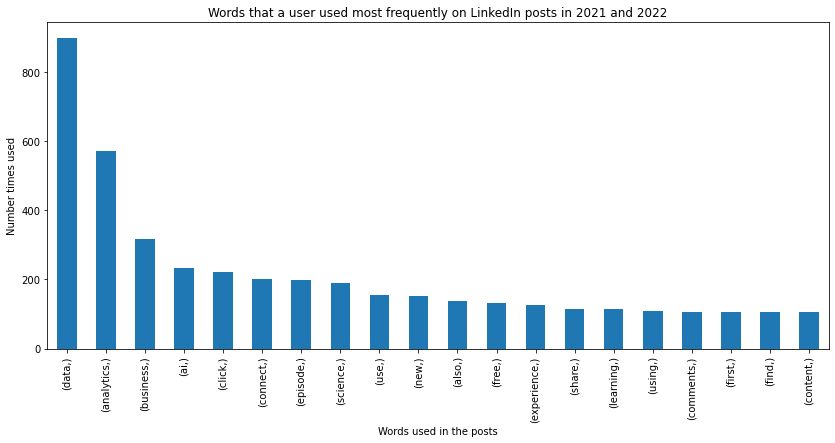

In [44]:
plt.figure(figsize=(14,6))
df_post.value_counts(ascending=False)[0:20].plot(kind='bar')
plt.title("Words that a user used most frequently on LinkedIn posts in 2021 and 2022")
plt.xlabel("Words used in the posts")
plt.ylabel("Number times used")
;

In [ ]:
df_post.to_excel('df_post.xlsx')